In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, naive_bayes, neighbors, svm
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

In [105]:
train = pd.read_csv('train_titanic.csv')
test = pd.read_csv('test_titanic.csv')
submission = pd.read_csv('gender_titanic.csv')

In [106]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [109]:
train.shape

(891, 12)

In [110]:
test.shape

(418, 11)

In [111]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [114]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Uruchurtu, Don. Manuel E",male,347082,G6,S
freq,1,577,7,4,644


##Penentuan Jenis Data

In [115]:
#Data Kategorikal
print('Data berjenis Kategorikal')
train.select_dtypes('object').columns

Data berjenis Kategorikal


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [116]:
#Data Numerical
print('Data berjenis Numerical')
train.select_dtypes('float64').columns

Data berjenis Numerical


Index(['Age', 'Fare'], dtype='object')

In [117]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [118]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [119]:
totaldata = train.isna().sum().sort_values(ascending=False)
presentasedata = (train.isna().sum() / train.isna().count()).sort_values(ascending=False)

datahilang = pd.concat([totaldata, presentasedata], axis=1, keys=['Total', 'Percent'])
datahilang

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [120]:
test.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Ticket'], axis = 1, inplace = True)
train.drop(['Ticket'], axis = 1, inplace = True)
train.drop(['Cabin'], axis = 1, inplace = True)

In [121]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [122]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [123]:
train_df = train.copy()

In [124]:
# mengganti data yang hilang dengan nilai median
train_df['Age'].fillna(value=train_df['Age'].median(), inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [125]:
train_df['Embarked'] = train_df['Embarked'].fillna(method = 'pad')

In [126]:
test_df = test.copy()

In [129]:
data_testforsbs = test.copy()

In [130]:
# mengganti data yang hilang dengan nilai median
test_df['Age'].fillna(value=test_df['Age'].median(), inplace=True)
test_df['Fare'] = test_df['Fare'].fillna(method = 'pad')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [131]:
num_features=[col for col in train_df.columns if train_df[col].dtype!='O']
num_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [132]:
num_data = train_df[num_features]
num_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [133]:
# Check Data Outlier
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [134]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [135]:
for col in num_data.columns:
    has_outliers(num_data, col)

PassengerId no
Survived no
Pclass no
Age no
SibSp yes
SibSp no
Parch yes
Parch no
Fare yes
Fare no


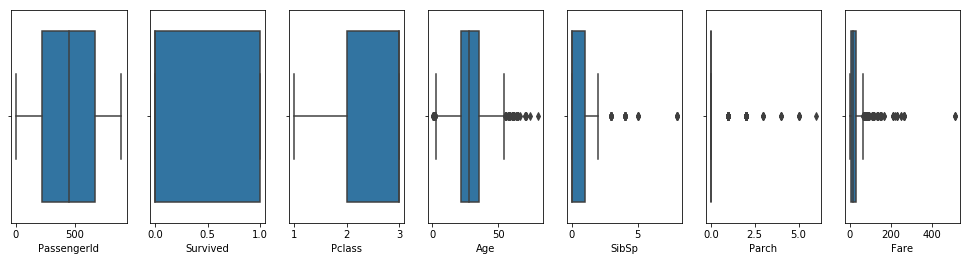

In [136]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

In [137]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [138]:
replace_with_thresholds(num_data, num_data.columns)

C:\Users\NSCA\anaconda3\new anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\NSCA\anaconda3\new anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\NSCA\anaconda3\new anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

In [139]:
for col in num_data.columns:
    has_outliers(num_data, col)

PassengerId no
Survived no
Pclass no
Age no
SibSp no
Parch no
Fare no


##Exploratory Data Analayst

In [140]:
train_df['identity']=train.Name.str.extract(' ([A-Za-z]+)\.')
test_df['identity']=train.Name.str.extract(' ([A-Za-z]+)\.')

In [141]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,identity
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [142]:
pd.crosstab(train_df['identity'],train_df['Sex'])

Sex,female,male
identity,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [143]:
train_df['identity']=train_df['identity'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Master','Mile','Mme','Ms','Rev','Sir'],'Other')

In [144]:
test_df['identity']=test_df['identity'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Master','Mile','Mme','Ms','Rev','Sir'],'Other')

In [145]:
grouped=train_df['Age'].groupby(train_df['identity'])
grouped.mean()
grouped_test=test_df['Age'].groupby(test_df['identity'])
grouped_test.mean()

identity
Miss     31.099010
Mr       29.138904
Mrs      28.497069
Other    30.161290
Name: Age, dtype: float64

In [146]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,identity
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [147]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [148]:
age_groups = []
for i in train_df['Age']:
    if i <= 30:
        age_groups.append('0-30')
    if i > 30 and i <= 40:
        age_groups.append('30-40')
    if i > 40 and i <= 50:
        age_groups.append('40-50')
    if i > 50 and i <= 60:
        age_groups.append('50-60')
    if i > 60:
        age_groups.append('60+')
        
train_df['AgeGroup'] = age_groups

In [149]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,identity,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,0-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,30-40


In [150]:
encoder = LabelEncoder()

train_df['AgeGroup']= encoder.fit_transform(train_df['AgeGroup'])
AgeGroup = {index : label for index, label in enumerate(encoder.classes_)}
AgeGroup

{0: '0-30', 1: '30-40', 2: '40-50', 3: '50-60', 4: '60+'}

In [151]:
UbahData = ['Embarked', 'identity', 'Sex']
UbahData

['Embarked', 'identity', 'Sex']

In [152]:
labelencoder = LabelEncoder()
for i in UbahData:
  train_df[i] = train_df[i].astype(str)
  train_df[i] = labelencoder.fit_transform(train_df[i])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int32
identity       891 non-null int32
AgeGroup       891 non-null int32
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 66.2+ KB


In [153]:
age_groups = []
for i in test_df['Age']:
    if i <= 30:
        age_groups.append('0-30')
    if i > 30 and i <= 40:
        age_groups.append('30-40')
    if i > 40 and i <= 50:
        age_groups.append('40-50')
    if i > 50 and i <= 60:
        age_groups.append('50-60')
    if i > 60:
        age_groups.append('60+')
        
test_df['AgeGroup'] = age_groups

In [154]:
encoder = LabelEncoder()

test_df['AgeGroup']= encoder.fit_transform(test_df['AgeGroup'])
AgeGroup = {index : label for index, label in enumerate(encoder.classes_)}
AgeGroup

{0: '0-30', 1: '30-40', 2: '40-50', 3: '50-60', 4: '60+'}

In [155]:
UbahData = ['Embarked', 'identity', 'Sex']
UbahData

['Embarked', 'identity', 'Sex']

In [156]:
labelencoder = LabelEncoder()
for i in UbahData:
  test_df[i] = test_df[i].astype(str)
  test_df[i] = labelencoder.fit_transform(test_df[i])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int32
identity       418 non-null int32
AgeGroup       418 non-null int32
dtypes: float64(2), int32(4), int64(4), object(1)
memory usage: 27.8+ KB


In [157]:
# Drop unnecessary column

train_df.drop('Name', axis=1, inplace=True)
train_df.drop('Age', axis=1, inplace=True)

test_df.drop('Name', axis=1, inplace=True)
test_df.drop('Age', axis=1, inplace=True)

In [159]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,identity,AgeGroup
0,1,0,3,1,1,0,7.2500,2,1,0
1,2,1,1,0,1,0,71.2833,0,2,1
2,3,1,3,0,0,0,7.9250,2,0,0
3,4,1,1,0,1,0,53.1000,2,2,1
4,5,0,3,1,0,0,8.0500,2,1,1


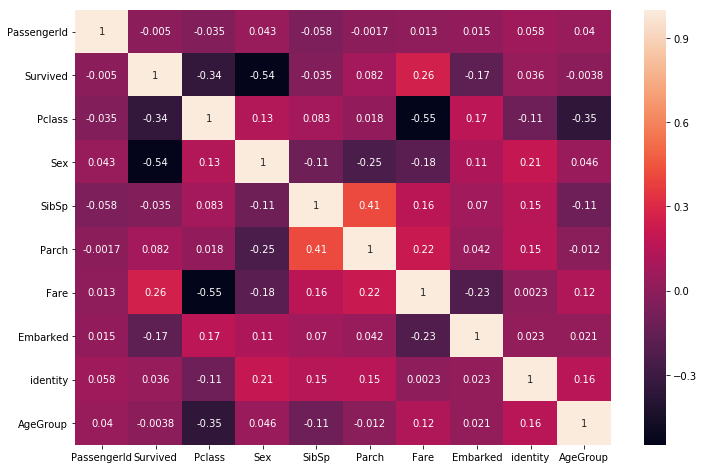

In [160]:
# now, plot the data

plt.figure(figsize=(12,8))
ax = sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [161]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()

In [162]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,identity,AgeGroup
0,1,0,3,1,1,0,7.2500,2,1,0
1,2,1,1,0,1,0,71.2833,0,2,1
2,3,1,3,0,0,0,7.9250,2,0,0
3,4,1,1,0,1,0,53.1000,2,2,1
4,5,0,3,1,0,0,8.0500,2,1,1


In [163]:
cols_to_norm = ['Fare']
train_df[cols_to_norm] = train_df[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())*100 ))

test_df[cols_to_norm] = test_df[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())*100 ))

In [164]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,identity,AgeGroup
0,1,0,3,1,1,0,1.415106,2,1,0
1,2,1,1,0,1,0,13.913574,0,2,1
2,3,1,3,0,0,0,1.546857,2,0,0
3,4,1,1,0,1,0,10.364430,2,2,1
4,5,0,3,1,0,0,1.571255,2,1,1


In [165]:
x = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [166]:
from sklearn import tree

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

# print the data
x_train

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,identity,AgeGroup
463,464,2,1,0,0,2.537431,2,1,2
858,859,3,0,0,3,3.758970,0,2,0
641,642,1,0,0,0,13.526459,0,3,0
691,692,3,0,0,1,2.618765,0,0,0
747,748,2,0,0,0,2.537431,2,0,0
392,393,3,1,2,0,1.546857,2,1,0
402,403,3,0,1,0,1.917712,2,0,0
595,596,3,1,1,1,4.713766,2,1,1
453,454,1,1,1,0,17.391982,0,1,2
255,256,3,0,0,2,2.975782,0,2,0


# Logistic Regression

In [167]:
log_reg = linear_model.LogisticRegression(max_iter = 5000)
log_reg.fit(x_train, y_train)
log_reg_acc = 100*log_reg.score(x_test, y_test)
print('Logistic Regression Predictions: \n', log_reg.predict(x_test), '\n Accuracy:', log_reg_acc, '%')

Logistic Regression Predictions: 
 [0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 1] 
 Accuracy: 84.70149253731343 %


In [168]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_train,y_train)

C:\Users\NSCA\anaconda3\new anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
pred = clf.predict(x_test)

In [170]:
y_test

709    1
89     0
200    0
240    0
705    0
6      0
58     1
366    1
638    0
851    0
799    0
260    0
475    0
769    0
759    1
404    0
326    0
184    1
618    1
258    1
616    0
407    1
670    1
83     0
211    1
379    0
350    0
10     1
227    0
524    0
      ..
208    1
300    1
131    0
458    1
807    0
331    0
735    0
451    0
54     0
817    0
269    1
648    0
127    1
461    0
866    1
470    0
771    0
117    0
479    1
460    1
413    0
443    1
16     0
523    1
321    0
344    0
756    0
496    1
173    0
264    0
Name: Survived, Length: 268, dtype: int64

In [171]:
clf.score(x_test,y_test)

0.835820895522388

In [172]:
fnl = clf.predict(test_df)
fnl

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [173]:
fnl = pd.DataFrame(fnl,columns=['Survived'])
fnl

,Survived
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [174]:
def transformTo_bool(x):
    if x < 0.4:
        return False
    else:
        return True

fnl['Survived'] = fnl['Survived'].apply(transformTo_bool)

print(fnl)

     Survived
0       False
1        True
2       False
3       False
4        True
5       False
6        True
7       False
8        True
9       False
10      False
11      False
12       True
13      False
14       True
15       True
16       True
17      False
18       True
19       True
20      False
21      False
22       True
23      False
24       True
25      False
26       True
27      False
28      False
29      False
..        ...
388     False
389     False
390      True
391      True
392     False
393     False
394     False
395      True
396     False
397      True
398      True
399     False
400      True
401     False
402      True
403     False
404     False
405     False
406     False
407      True
408      True
409      True
410      True
411      True
412      True
413     False
414      True
415     False
416     False
417     False

[418 rows x 1 columns]


In [175]:
fnl = pd.DataFrame(fnl,columns=['Survived'])
sub = pd.concat([data_testforsbs['PassengerId'],fnl['Survived']],axis=1)

sub.set_index('PassengerId',inplace=True)

sub.to_csv("submission.csv")

# submission.to_csv('submission.csv', header=True, index=False)

In [178]:
dff = pd.read_csv('submission.csv')
dff.head()

,PassengerId,Survived
0,892,False
1,893,True
2,894,False
3,895,False
4,896,True


In [179]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.8523274478330658
RandomForestClassifierModel Test Score is :  0.8544776119402985
RandomForestClassifierModel features importances are :  [0.07801333 0.13470861 0.31912237 0.05063302 0.03386794 0.17897698
 0.03820214 0.13579832 0.03067729]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [1 0 0 1 0 0 1 1 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.33609069 0.66390931]
 [0.86561356 0.13438644]
 [0.86688539 0.13311461]
 [0.3301221  0.6698779 ]
 [0.79407428 0.20592572]
 [0.7084834  0.2915166 ]
 [0.22028781 0.77971219]
 [0.03989786 0.96010214]
 [0.7619866  0.2380134 ]
 [0.8630922  0.1369078 ]]


In [180]:
svm = svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_acc = 100*svm.score(x_test, y_test)
print('SVM Predictions: \n', svm.predict(x_test), '\n Accuracy:', svm_acc, '%')

SVM Predictions: 
 [0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 1] 
 Accuracy: 83.2089552238806 %


In [181]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
knn_acc = 100*knn.score(x_test, y_test)
print('K-Nearest Neighbours Predictions: \n', knn.predict(x_test), '\n Accuracy:', knn_acc, '%')

K-Nearest Neighbours Predictions: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0] 
 Accuracy: 61.940298507462686 %


In [182]:
nb = naive_bayes.GaussianNB()
nb.fit(x_train, y_train)
nb_acc = 100*nb.score(x_test, y_test)
print('Naive Bayes Predictions: \n', nb.predict(x_test), '\n Accuracy:', nb_acc, '%')

Naive Bayes Predictions: 
 [1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0
 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 1] 
 Accuracy: 84.70149253731343 %


In [183]:
from sklearn.tree import DecisionTreeClassifier 
# Import Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 


tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(x_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")

# Train Decision Tree Classifer
tree = tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Train score: 0.7544141252006421
Test score: 0.7873134328358209
Accuracy: 0.8470149253731343
